In [1]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 5.2 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp37-cp37m-linux_x86_64.whl size=310574 sha256=bfaa8a1c465fb51263560278c1efd5583c34629df1f42f7857d6507d1c5525cf
  Stored in directory: /root/.cache/pip/wheels/65/df/9e/39aa22a3f47ec58751b5bf6907036fbc131d85b6d7cbd3b3fe
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [2]:
#import the python library
%load_ext rpy2.ipython

In [3]:
%%R
library(tidyverse)


✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# **Descriptive Analytics Techniques**

In [33]:
%%R
bank= read.csv('/content/Churn_Modelling1.csv')
head(bank)

  RowNumber CustomerId  Surname CreditScore Geography Gender Age Tenure
1         1   15634602 Hargrave         619    France Female  42      2
2         2   15647311     Hill         608     Spain Female  41      1
3         3   15619304     Onio         502    France Female  42      8
4         4   15701354     Boni         699    France Female  39      1
5         5   15737888 Mitchell         850     Spain Female  43      2
6         6   15574012      Chu         645     Spain   Male  44      8
    Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited
1      0.00             1         1              1       101348.88      1
2  83807.86             1         0              1       112542.58      0
3 159660.80             3         1              0       113931.57      1
4      0.00             2         0              0        93826.63      0
5 125510.82             1         1              1        79084.10      0
6 113755.78             2         1              0  

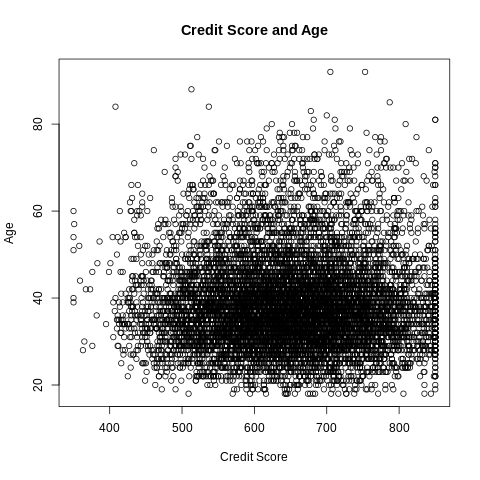

In [6]:
# Plot graph using Credit Score and Age
%%R
plot(bank$CreditScore,bank$Age, xlab = "Credit Score", ylab = "Age",main="Credit Score and Age")

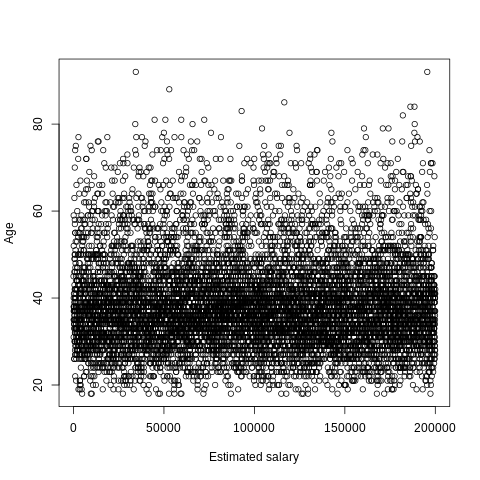

In [7]:
# Plot graph using EstimatedSalary and Age
%%R
plot(bank$EstimatedSalary , bank$Age, xlab = "Estimated salary", ylab = "Age")

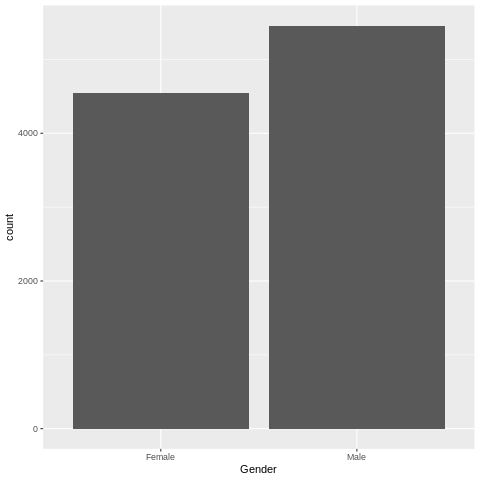

In [8]:
# Plot Bar Graph to get count of Gender in dataset
%%R
library(ggplot2)
ggplot(data = bank) +
  geom_bar(aes(x = Gender), stat = "count")

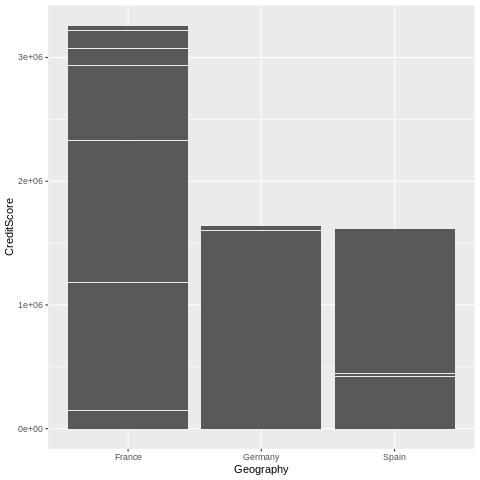

In [9]:
# Plot Bar Graph using Geography and CreditScore
%%R
ggplot(data = bank) +
  geom_col(aes(x = Geography, y = CreditScore))

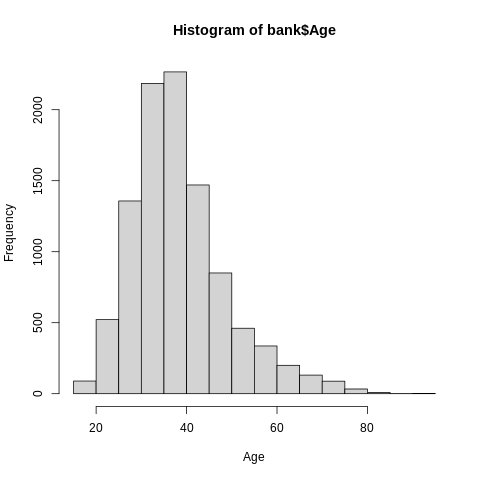

In [10]:
# Plot Histogram of "Age" attribute in dataset. 
%%R
hist(bank$Age, xlab = "Age", ylab = "Frequency")

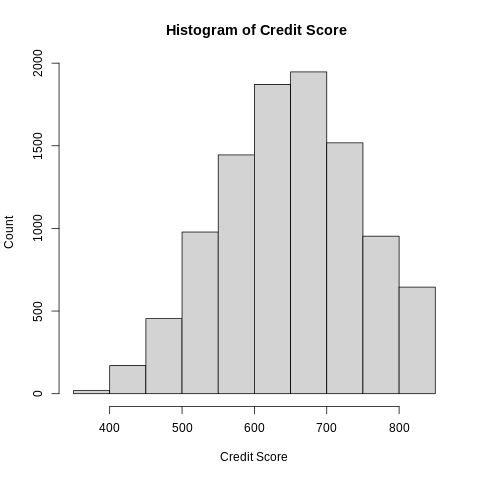

In [11]:
# Plot Histogram of "CreditScore" attribute in dataset. 
%%R
hist(bank$CreditScore, xlab = "Credit Score", ylab = "Count", main = " Histogram of Credit Score")

In [12]:
%%R
credit=bank$CreditScore
freqTable = table(credit)
mode = names(freqTable)[which(freqTable==max(freqTable))]
print(c('mode:',mode))

mean=mean(credit)
print(c('mean:',mean))

median=median(credit)
print(c('median:',median))

range = max(credit)-min(credit)
print(c('range:',range))

quantileValue=quantile(credit) #divides data in 0,25,50,75,100% values
Q1=quantileValue[2] #select 50% value generated above
Q3=quantileValue[4] #select 100% value generated above
IQR=Q3-Q1
print(c('IQR:',IQR))

variance=sd(credit)
print(c('variance:',variance))

# Calculate Standard Deviation
stdDev =sd(credit)
print(c("Standard Deviation is: ",stdDev))

summary=summary(credit)
print("Summary of variable Credit Score is: ")
summary

[1] "mode:" "850"  
[1] "mean:"    "650.5288"
[1] "median:" "652"    
[1] "range:" "500"   
          75% 
"IQR:"  "134" 
[1] "variance:"        "96.6532987361304"
[1] "Standard Deviation is: " "96.6532987361304"       
[1] "Summary of variable Credit Score is: "
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  350.0   584.0   652.0   650.5   718.0   850.0 


In [13]:
#data normalisation(Z-score)
%%R
zScore=(credit-mean)/variance
print(c('Z-score:',zScore))

    [1] "Z-score:"             "-0.326205110557847"   "-0.44001395250985"   
    [4] "-1.53671733859279"    "0.501495558183993"    "2.06378057043422"    
    [7] "-0.0572023932167491"  "1.77408533637457"     "-2.84034589186119"   
   [10] "-1.54706359695206"    "0.346301682794898"    "-1.26771462125169"   
   [13] "-1.58844863038915"    "-1.80572005593389"    "-1.05044319570696"   
   [16] "-0.160664976809479"   "-0.357243885635666"   "0.025567673657435"   
   [19] "-1.05044319570696"    "-0.657285378054584"   "0.780844533884365"   
   [22] "0.842922084040003"    "-0.150318718450206"   "-1.45394727171861"   
   [25] "0.191107807405803"    "2.02239553699713"     "-0.760747961647314"  
   [28] "1.09123228466255"     "-0.822825511802952"   "-0.791786736725133"  
   [31] "-2.47822684928663"    "-0.615900344617492"   "-1.21598332945533"   
   [34] "-1.00905816226987"    "-1.35048468812588"    "0.739459500447273"   
   [37] "-1.81606631429316"    "-1.66087243890407"    "1.58785268590766"    

In [14]:
%%R
scaledData = (credit-min(credit))/range
print(c('Scaled Data:',scaledData))

    [1] "Scaled Data:" "0.538"        "0.516"        "0.304"       
    [5] "0.698"        "1"            "0.59"         "0.944"       
    [9] "0.052"        "0.302"        "0.668"        "0.356"       
   [13] "0.294"        "0.252"        "0.398"        "0.57"        
   [17] "0.532"        "0.606"        "0.398"        "0.474"       
   [21] "0.752"        "0.764"        "0.572"        "0.32"        
   [25] "0.638"        "0.992"        "0.454"        "0.812"       
   [29] "0.442"        "0.448"        "0.122"        "0.482"       
   [33] "0.366"        "0.406"        "0.34"         "0.744"       
   [37] "0.25"         "0.28"         "0.908"        "1"           
   [41] "0.464"        "0.244"        "0.23"         "0.412"       
   [45] "0.968"        "0.62"         "0.852"        "0.958"       
   [49] "0.574"        "0.4"          "0.852"        "0.696"       
   [53] "0.47"         "0.876"        "0.61"         "0.502"       
   [57] "0.538"        "0.612"        "0.75"    

In [24]:
#outlier detection using z-score (can be one sigma(-1,1),two sigma(-2,2) or three sigma(-3,3))
%%R
outlier1=c()
lower = -1; upper = 1
for(i in 1:length(zScore)) {
    if(zScore[i]<lower | zScore[i]>upper)
    {o=zScore[i]}
    else
    {o=NULL}
    outlier1=c(outlier1,o)
}
print(c('Outliers using one sigma:',outlier1))

   [1] "Outliers using one sigma:" "-1.53671733859279"        
   [3] "2.06378057043422"          "1.77408533637457"         
   [5] "-2.84034589186119"         "-1.54706359695206"        
   [7] "-1.26771462125169"         "-1.58844863038915"        
   [9] "-1.80572005593389"         "-1.05044319570696"        
  [11] "-1.05044319570696"         "-1.45394727171861"        
  [13] "2.02239553699713"          "1.09123228466255"         
  [15] "-2.47822684928663"         "-1.21598332945533"        
  [17] "-1.00905816226987"         "-1.35048468812588"        
  [19] "-1.81606631429316"         "-1.66087243890407"        
  [21] "1.58785268590766"          "2.06378057043422"         
  [23] "-1.84710508937098"         "-1.91952889788589"        
  [25] "1.89824043668585"          "1.29815745184802"         
  [27] "1.84650914488948"          "-1.04009693734768"        
  [29] "1.29815745184802"          "1.42231255215929"         
  [31] "-1.44360101335933"         "1.03950099286619"  

In [25]:
#outlier detection using box plot
%%R
lowerBoxValue=Q1-1.5*IQR
upperBoxValue=Q3+1.5*IQR
outlier2=c()
for(i in credit) {
    if(i<lowerBoxValue || i>upperBoxValue) {o=i}
    else {o=NULL}
    outlier2=c(outlier2,o)
}
print(c('Outliers using box plot:',outlier2))

Streaming output truncated to the last 5000 lines.
    [5] "0"                        "1"                       
    [7] "1"                        "1"                       
    [9] "1"                        "0"                       
   [11] "1"                        "0"                       
   [13] "1"                        "1"                       
   [15] "0"                        "1"                       
   [17] "0"                        "1"                       
   [19] "1"                        "0"                       
   [21] "1"                        "1"                       
   [23] "1"                        "1"                       
   [25] "0"                        "1"                       
   [27] "0"                        "1"                       
   [29] "0"                        "1"                       
   [31] "1"                        "1"                       
   [33] "0"                        "0"                       
   [35] "1"        

# Bernoulli Distribution

In [26]:
#Bernouli distribution performed on the 'HasCrCard' column
%%R
credit=bank$HasCrCard
probabilty = E = mean(credit)
#probability =  0.7055t
variance  = probabilty*(1-probabilty)
#variance = 0.2077698
#Probability simulation for 100 samples
print(rbinom(100,1,probabilty))
#  1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1
#  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0
#  0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0

#probability of having 0
dbinom(0,1,probabilty)

  [1] 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 [38] 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 [75] 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0
[1] 0.2945


# Poisson Distribution

In [27]:
%%R
age=bank$Age 
lambda=mean(age) # since expectation(x) = mean(x) therefore lambda = mean(x).
print (lambda)
#lambda = mean = 38.9218
#probability simulation for a sample of 100
print(rpois (100, lambda))
#Output:  
# 39 44 33 47 48 36 44 40 38 40 47 31 45 33 45 25 36 49 43 43 40 34 39 51 41
# 38 32 34 42 38 48 29 41 36 39 29 43 34 40 34 37 43 43 39 36 43 42 42 41 36
# 35 26 33 39 51 38 34 48 36 36 36 41 43 37 40 49 45 35 38 30 34 37 31 41 33
# 40 29 43 33 30 34 31 39 32 32 44 27 30 35 39 33 31 38 47 50 39 36 43 39 36
#probability of age being 35 
print(dpois(35, lambda))
# Output = 0.05482725
# Probability of age<35
print(ppois (35, lambda))
# Output = 0.2981913

[1] 38.9218
  [1] 32 39 35 36 37 42 43 28 42 36 41 25 40 44 40 50 30 45 52 40 46 40 27 46 29
 [26] 35 46 36 39 49 49 48 35 32 45 33 42 28 41 35 43 38 28 37 29 42 37 56 45 29
 [51] 36 38 41 45 47 36 33 38 40 44 34 35 27 37 34 28 51 33 38 50 47 36 51 53 43
 [76] 31 30 42 31 46 46 27 37 43 35 44 35 37 47 37 36 41 43 39 43 46 40 39 44 36
[1] 0.05482725
[1] 0.2981913


# Normal Distribution

In [28]:
%%R
creditScore=bank$CreditScore 
#Glucose column continous probabilty distribution y-datafGlucose
mu=mean(creditScore, na.rm=TRUE)
print (mu)
#mu = 650.5288
standardDev=sqrt(var(creditScore))
print(standardDev)
#Standard deviation = 96.6533


#Model simulation: Taking a sample of 30
Samples=30
rnorm(Samples,mu,standardDev)
#Output:
# 650.6469 640.2140 767.8427 619.8464 830.2251 579.0275 672.5518 581.2589
# 539.9968 729.8835 706.6299 634.5905 747.0763 516.9245 636.9955 787.4013
# 502.0909 725.2931 621.7210 718.5662 774.3672 630.7142 576.3169 665.8610
# 583.0380 705.1567 735.4258 680.6777 636.2203 686.0346

#Probability of having a credit score of 645:
print(dnorm(645, mu, standardDev))
# Output = 0.004120813
#Probability of having a credit score higher than 645:
print(1-pnorm(645,mu, standardDev))
#Output = 0.522808

[1] 650.5288
[1] 96.6533
[1] 0.004120813
[1] 0.522808


# Hypothesis Testing: Lower One-Sided Hypotheses - Test of Mean


*  Apply “Lower One-Sided Hypotheses Testing of Mean” on “Credit Score” column
*  Test whether the mean of credit score is greater than 645 at a 5% level of significance. 

In [29]:
%%R
data=bank$CreditScore
head(data)
#Step 1 
#HO:mu>645, H1:mu<=645

#Step 2 
alpha=0.05
mu0=645 
xbar=mean(data,na.rm=TRUE)
sigma=var(data)
n=length(data)

#Step 3
test_value=(xbar-mu0)/sqrt(sigma/n)
print(c('test_value = ',test_value))

#Step 4
c_value=qnorm(alpha)
print(c('c_value = ',c_value))

#Step 5
#As the test.value is > c.value, therefore H0 is accepted.

[1] "test_value = "    "5.72023932167491"
[1] "c_value = "        "-1.64485362695147"


After getting the results of the test, we interpret that the average of “CreditScore” is greater than 645 for our case at 5% significance level.

# Hypothesis testing: Test of Variance for Two Populations

As our second hypothesis test, we apply “Two-Sided Hypotheses Testing of Variance for Two Populations on “CreditScore” and “EstimatedSalary” columns. 
We aim to test whether there is a difference between the variance at the 5% significance level

In [30]:
%%R
data1 = bank$CreditScore
data2 = bank$Age
#Step 1 
#HO:var1=var2, H1:var1!=var2

#Step 2
alpha=0.05
var1=var(data1)
var2=var(data2)
n1=length(data1)
n2=length(data2)

#Step 3
test_value=var1/var2
print(c('test_value',test_value))

#Step 4
c1_value=qf(alpha/2,(n1-1),(n2-1))
print(c('c1_value',c1_value))
c2_value=qf((1-alpha/2),(n1-1),(n2-1))
print(c('c2_value',c2_value))

#Step 5
#As the test.value > c1.value,c2.value, therefore H0 is accepted.

[1] "test_value"       "84.9305690138019"
[1] "c1_value"          "0.961555036771397"
[1] "c2_value"        "1.0399820725371"


After getting the results of the test, we can clearly say that the variances of “CreditScore” and “EstimatedSalary” data are not equal at 5% significance level.

# Hypothesis testing : Lower One-Sided Hypotheses Testing of Proportion 

We apply “Lower One-Sided Hypotheses Testing of Proportion on our binary variable column: "HasCrCard" . We want to test whether the ratio of ones in the "HasCrCard" data is greater than 70% at the level of 2% significance level

In [31]:
%%R
card = bank$HasCrCard
#Step 1 
#H0:p>0.7, H1:p<=0.7

#Step 2
alpha=0.02
p0=0.7
n=length(card)
phat=sum(card)/n

#Step 3
test_value=(phat-p0)/sqrt(p0*(1-p0)/n)
print(c('test_value',test_value))

#Step 4
c.value=qnorm(alpha)
print(c('c_value',c_value))

#Step 5
#As the test.value > c.value, therefore HO is accepted.


[1] "test_value"       "1.20019839629797"
[1] "c_value"           "-1.64485362695147"


Based on the findings of the hypothesis testing we performed above, we can say that the proportion of ones in "HasCrCard" data is greater than 70%.

# Hypothesis Test: test of Independence for Two Categorical Variables (p.value approach) 

we will use p.value approach to test whether “CreditScore” and “Age” are independent at 0.02 significance level

In [32]:
%%R
#Step 1
#H0: CreditScore (X1) and EstimatedSalary (X2) are independent
#H1: X1 and X2 are dependent
X1=bank$CreditScore
X2=bank$Age

#Step 2
alpha=0.02
F=table(X1,X2)

#Step 3 
test=chisq.test(F)
test$p.value 
#0.4345769

#Step 4
c(test$p.value,alpha) 

#When we run this code, we get the vector of p.value and alpha as below:
#0.4345769 0.0200000

#Step 5
#since p.value < alpha HO is rejected: CreditScore and Age are dependent.

[1] 0.0009404569 0.0200000000


At 0.02 significance level our hypotheses test shows CreditScore and Age variables are correlated, in other words dependent. 